# Plot a Map of the Anegada Passage Region with glider transects

In [1]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import numpy as np
import glob
import datetime
import xarray as xr
import cmocean.cm as cmo
import sys

## To import functions from Slocum-AD2CP GitHub repository, make this path the path to where the repo exists locally
sys.path.insert(0,'/home/jg1200/GitHub/Slocum-AD2CP/src/analysis/')
from analysis import gsw_rho, profile_mld, get_erddap_dataset, grid_glider_data, dist_from_lat_lon

myFmtshort = mdates.DateFormatter('%m/%d\n%H:%M')
myFmtlong = mdates.DateFormatter('%y/%m/%d\n%H:%M')
myFmt = mdates.DateFormatter('%m/%d/%y')

# Load data
## 2020 first

In [2]:
ds_id = 'ru29-20200908T1623-trajectory-raw-delayed'

## Load flight data
variables = ['depth', 'latitude', 'longitude', 'time']
gdf_2020 = get_erddap_dataset(ds_id, server='http://slocum-data.marine.rutgers.edu/erddap', variables = variables, filetype='dataframe')
gdf_2020.columns = variables

# Format time
gdf_2020.time = pd.to_datetime(gdf_2020.time.values).tz_localize(None).values

gdf_2020

,depth,latitude,longitude,time
0,0.00000,18.175290,-64.802942,2020-09-08 16:23:40.150
1,0.00000,18.175290,-64.802942,2020-09-08 16:23:47.430
2,NaN,18.175290,-64.802942,2020-09-08 16:23:47.560
3,NaN,18.175290,-64.802942,2020-09-08 16:24:48.430
4,NaN,18.176045,-64.804093,2020-09-08 16:25:14.450
...,...,...,...,...
5087216,0.18886,18.139090,-64.784373,2020-11-12 07:31:32.760
5087217,0.18886,18.139090,-64.784373,2020-11-12 07:31:34.770
5087218,0.14910,18.139090,-64.784373,2020-11-12 07:31:36.790
5087219,0.15904,18.139090,-64.784373,2020-11-12 07:31:38.800


## Then 2021 a

In [3]:
ds_id = 'ru29-20210630T1343-trajectory-raw-delayed'

## Load flight data
variables = ['latitude', 'longitude', 'time']
gdf_2021_a = get_erddap_dataset(ds_id, server='http://slocum-data.marine.rutgers.edu/erddap', variables = variables, filetype='dataframe')
gdf_2021_a.columns = variables

## Format time
gdf_2021_a.time = pd.to_datetime(gdf_2021_a.time.values).tz_localize(None).values

gdf_2021_a

,latitude,longitude,time
0,18.170740,-64.831853,2021-06-30 13:43:52
1,18.170740,-64.831853,2021-06-30 13:43:57
2,18.170740,-64.831853,2021-06-30 13:43:57
3,18.170740,-64.831853,2021-06-30 13:44:54
4,18.170465,-64.834150,2021-06-30 13:45:20
...,...,...,...
732984,18.164417,-63.468548,2021-07-12 12:53:52
732985,18.164417,-63.468548,2021-07-12 12:53:54
732986,18.164417,-63.468548,2021-07-12 12:53:56
732987,18.164417,-63.468548,2021-07-12 12:53:58


## Then 2021 b

In [4]:
ds_id = 'ru29-20210908T1943-trajectory-raw-delayed'

## Load flight data
variables = ['latitude', 'longitude', 'time']
gdf_2021_b = get_erddap_dataset(ds_id, server='http://slocum-data.marine.rutgers.edu/erddap', variables = variables, filetype='dataframe')
gdf_2021_b.columns = variables

## Format time
gdf_2021_b.time = pd.to_datetime(gdf_2021_b.time.values).tz_localize(None).values

gdf_2021_b

,latitude,longitude,time
0,18.172288,-64.968623,2021-09-08 19:43:16.840
1,18.172288,-64.968623,2021-09-08 19:43:22.010
2,18.172288,-64.968623,2021-09-08 19:43:23.840
3,18.172288,-64.968623,2021-09-08 19:44:26.300
4,18.172270,-64.968681,2021-09-08 19:44:52.370
...,...,...,...
1453164,NaN,NaN,2021-10-07 19:57:17.470
1453165,NaN,NaN,2021-10-07 19:57:23.310
1453166,NaN,NaN,2021-10-07 19:57:30.350
1453167,NaN,NaN,2021-10-07 19:57:34.800


## Then 2022 a

In [5]:
ds_id = 'ru36-20220223T1807-trajectory-raw-delayed'

## Load flight data
variables = ['latitude', 'longitude', 'time']
gdf_2022_a = get_erddap_dataset(ds_id, server='http://slocum-data.marine.rutgers.edu/erddap', variables = variables, filetype='dataframe')
gdf_2022_a.columns = variables

## Format time
gdf_2022_a.time = pd.to_datetime(gdf_2022_a.time.values).tz_localize(None).values

gdf_2022_a

,latitude,longitude,time
0,18.179557,-64.932412,2022-02-23 18:07:14.260
1,18.179557,-64.932412,2022-02-23 18:07:15.230
2,18.179557,-64.932412,2022-02-23 18:07:16.040
3,18.179557,-64.932412,2022-02-23 18:07:17.040
4,18.179557,-64.932412,2022-02-23 18:07:18.040
...,...,...,...
4238633,18.167968,-64.826620,2022-03-17 05:05:11.420
4238634,18.167968,-64.826620,2022-03-17 05:05:15.420
4238635,18.167968,-64.826620,2022-03-17 05:05:19.420
4238636,18.167968,-64.826620,2022-03-17 05:05:23.420


## Last 2022 b

In [6]:
ds_id = 'ru36-20220413T2107-trajectory-raw-delayed'

## Load flight data
variables = ['latitude', 'longitude', 'time']
gdf_2022_b = get_erddap_dataset(ds_id, server='http://slocum-data.marine.rutgers.edu/erddap', variables = variables, filetype='dataframe')
gdf_2022_b.columns = variables

## Format time
gdf_2022_b.time = pd.to_datetime(gdf_2022_b.time.values).tz_localize(None).values

gdf_2022_b

,latitude,longitude,time
0,18.113252,-64.808007,2022-04-14 07:26:17.460
1,18.113252,-64.808007,2022-04-14 07:26:19.300
2,18.113252,-64.808007,2022-04-14 07:26:19.300
3,18.113253,-64.808011,2022-04-14 07:26:19.460
4,18.113259,-64.808037,2022-04-14 07:26:20.460
...,...,...,...
1495082,18.180467,-64.851915,2022-05-04 13:41:37.000
1495083,18.180467,-64.851915,2022-05-04 13:41:38.000
1495084,18.180467,-64.851915,2022-05-04 13:41:39.000
1495085,18.180467,-64.851915,2022-05-04 13:41:40.000


## Load Bathymetry Data

In [7]:
fname = 'https://gamone.whoi.edu/thredds/dodsC/usgs/data0/bathy/ETOPO2v2c_f4.nc'
ds_etpo = xr.open_dataset(fname)   

## Plot it up

In [8]:
fig, ax = plt.subplots(figsize=(20, 15), subplot_kw=dict(projection=ccrs.Mercator()))

## Set lon and lat ranges
lon1 = -66
lon2 = -62.3
lat1 = 17.2
lat2 = 18.8

ax.set_extent([lon1, lon2, lat1, lat2])
## Isobars to plot
lvl = [-4000, -3000, -2500, -2000, -1500, -1000, -750, -500, -400, -300, -200, -100]
## Depth contours to plot
#dpth_contours = np.array([-6500, -5000,-4000, -3000, -2000, -1000,0])
dpth_contours = np.array([-6500, -5750,-5000,-4250,-3500,-2750,-2000, -1000,0])
## Subset bathymetry
region = ds_etpo.sel(x=slice(lon1, lon2), y=slice(lat1, lat2))

# bathy = ax.contourf(region.x, region.y, region.z,levels=50,  cmap='Blues_r' ,  transform=ccrs.PlateCarree(), vmin=-3000, vmax=0, zorder=0)
bathy = ax.contourf(region.x, region.y, region.z,  cmap='Blues_r' ,  transform=ccrs.PlateCarree(), levels=dpth_contours, zorder=0)
ax.contour(region.x, region.y, region.z, levels= lvl, colors='k', linestyles='solid', linewidths=.4,  transform=ccrs.PlateCarree())


LAND = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m',
    edgecolor='black',
    facecolor='black'
)

ax.add_feature(LAND, zorder=0)

glb = ax.gridlines(draw_labels=True, alpha=0.5, linewidth=.5 )
glb.xlabels_top = glb.ylabels_right = False
glb.xlabel_style = {'size': 22}
glb.ylabel_style = {'size': 22}
glb.ylocator = mticker.FixedLocator([18, 18.25, 18.5, 18.75])
glb.xlocator = mticker.FixedLocator([-65, -64.5, -64, -63.5, -63, -62.5])



ax.plot(gdf_2020.longitude, gdf_2020.latitude,'.',transform=ccrs.PlateCarree(),color='firebrick')
ax.plot(gdf_2021_a.longitude, gdf_2021_a.latitude,'.',transform=ccrs.PlateCarree(),color='green')
ax.plot(gdf_2021_b.longitude, gdf_2021_b.latitude,'.',transform=ccrs.PlateCarree(),color='yellow')
ax.plot(gdf_2022_a.longitude, gdf_2022_a.latitude,'.',transform=ccrs.PlateCarree(),color='orange')
#ax.plot(gdf_2022_b.longitude, gdf_2022_b.latitude,'.',transform=ccrs.PlateCarree(),color='black')


cbar = plt.colorbar(bathy,pad=0.03, fraction=0.024)
cbar.set_label(label='Depth [meters]', size=22, weight='bold')
cbar.ax.tick_params(labelsize=22)

### Pretty globe projection but the zoom isn't great for Caribbean
## Add a small, zoomed out map for context
## bbox_to_anchor(left, bottom, width, height)
# axins = inset_axes(ax, width="67%", height="67%",
#                    bbox_to_anchor=(-0.56, -0.5, 1, 1),
#                    bbox_transform=ax.transAxes,
#                    axes_class=cartopy.mpl.geoaxes.GeoAxes,
#                    axes_kwargs=dict(map_projection=ccrs.NearsidePerspective(central_longitude=-65.5, central_latitude=17,satellite_height=95000)))
#axins.set_global()


## Trying another projection
## Add a small, zoomed out map for context
## bbox_to_anchor(left, bottom, width, height)
axins = inset_axes(ax, width="35%", height="62%",
                   bbox_to_anchor=(-0.75, -0.4, 1, 1),
                   bbox_transform=ax.transAxes,
                   axes_class=cartopy.mpl.geoaxes.GeoAxes,
                   axes_kwargs=dict(map_projection=ccrs.Mercator(central_longitude=-65.5)))

## Extent of inset map
lon1_big = -84
lon2_big = -60
lat1_big = 7.5
lat2_big = 28
axins.set_extent([lon1_big, lon2_big, lat1_big, lat2_big])

## Box around actual figure region
axins.plot([lon1, lon1,  lon2, lon2, lon1] , 
                        [lat1, lat2, lat2, lat1, lat1 ], color='black',linewidth=7,  transform=ccrs.PlateCarree(), zorder=100 )
axins.add_feature(LAND, zorder=0)
axins.gridlines(linewidths=.5)

region = ds_etpo.sel(x=slice(lon1_big, lon2_big), y=slice(lat1_big, lat2_big))
## Similar to the main plot but just a tad deeper
dpth_contours = np.array([-9000,-7000,-5750,-5000,-4250,-3500,-2750,-2000, -1000,0])

axins.contourf(region.x, region.y, region.z,levels=dpth_contours,  cmap='Blues_r' ,  transform=ccrs.PlateCarree(), zorder=0)

plt.savefig('/home/jg1200/Figures/RU29_2020_2022_Anegada_Map_FULL.png',dpi=300,facecolor='white',bbox_inches='tight')


/projects/dmcs_1/sw/packages/xroms/py38/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/projects/dmcs_1/sw/packages/xroms/py38/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f2f59a54430> (for post_execute):


KeyboardInterrupt: 

/projects/dmcs_1/sw/packages/xroms/py38/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/projects/dmcs_1/sw/packages/xroms/py38/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


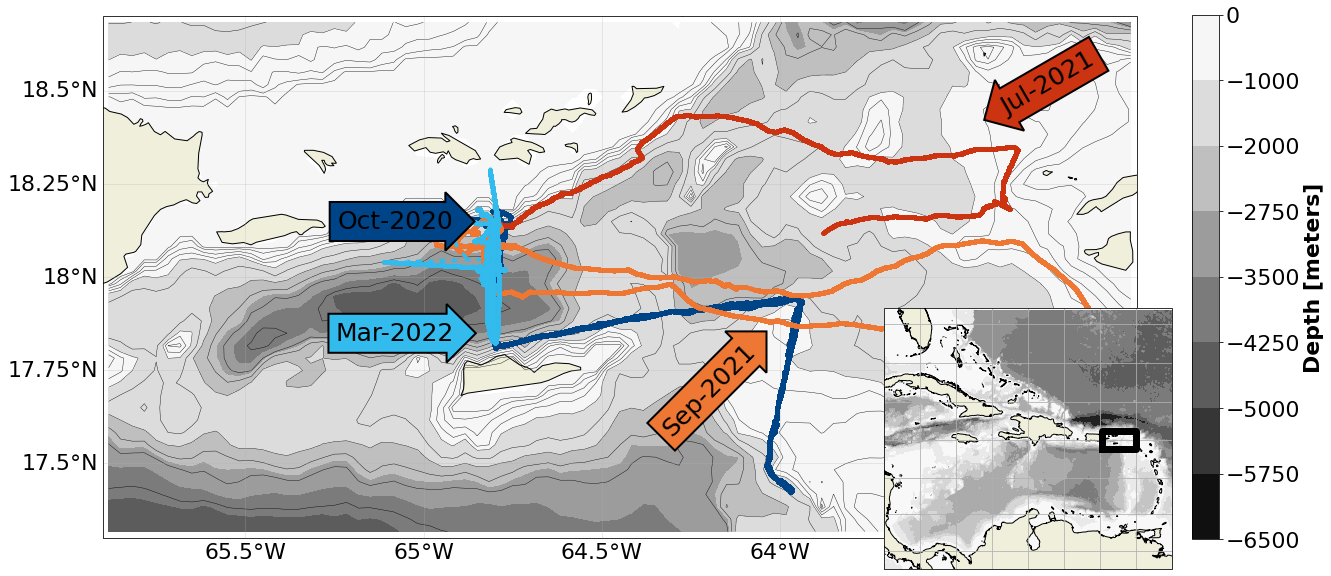

In [13]:
fig, ax = plt.subplots(figsize=(20, 15), subplot_kw=dict(projection=ccrs.Mercator()))

## Set lon and lat ranges
lon1 = -65.9
lon2 = -63
lat1 = 17.3
lat2 = 18.7

ax.set_extent([lon1, lon2, lat1, lat2])
## Isobars to plot
#lvl = [-4000, -3000, -2500, -2000, -1500, -1000, -750, -500, -400, -300, -200, -100]
lvl = [-4000, -3000, -2500, -2000, -1500, -1000, -750, -500, -250, -100]

## Depth contours to plot
#dpth_contours = np.array([-6500, -5000,-4000, -3000, -2000, -1000,0])
dpth_contours = np.array([-6500, -5750,-5000,-4250,-3500,-2750,-2000, -1000,0])
## Subset bathymetry
region = ds_etpo.sel(x=slice(lon1, lon2), y=slice(lat1, lat2))

# bathy = ax.contourf(region.x, region.y, region.z,levels=50,  cmap='Blues_r' ,  transform=ccrs.PlateCarree(), vmin=-3000, vmax=0, zorder=0)
bathy = ax.contourf(region.x, region.y, region.z,  cmap='Greys_r' ,  transform=ccrs.PlateCarree(), levels=dpth_contours, zorder=0)
ax.contour(region.x, region.y, region.z, levels= lvl, colors='k', linestyles='solid', linewidths=.4,  transform=ccrs.PlateCarree())


LAND = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m',
    edgecolor='black',
    facecolor=cfeature.COLORS['land']
)

ax.add_feature(LAND, zorder=0)

glb = ax.gridlines(draw_labels=True, alpha=0.5, linewidth=.5 )
glb.xlabels_top = glb.ylabels_right = False
glb.xlabel_style = {'size': 22}
glb.ylabel_style = {'size': 22}
glb.ylocator = mticker.FixedLocator([17, 17.25, 17.5, 17.75, 18, 18.25, 18.5, 18.75])
glb.xlocator = mticker.FixedLocator([-65.5,-65,-64.5,-64])

oct_2020_color = '#004488'
jul_2021_color = '#CC3311'
sep_2021_color = '#EE7733'
mar_2022_color = '#33BBEE'

ax.plot(gdf_2020.longitude[0::10], gdf_2020.latitude[0::10],'.',transform=ccrs.PlateCarree(),color=oct_2020_color)
ax.plot(gdf_2021_a.longitude[0::10], gdf_2021_a.latitude[0::10],'.',transform=ccrs.PlateCarree(),color=jul_2021_color)
ax.plot(gdf_2021_b.longitude[0::10], gdf_2021_b.latitude[0::10],'.',transform=ccrs.PlateCarree(),color=sep_2021_color)
ax.plot(gdf_2022_a.longitude[0::10], gdf_2022_a.latitude[0::10],'.',transform=ccrs.PlateCarree(),color=mar_2022_color)

# ax.plot(subset_ds_2020.longitude, subset_ds_2020.latitude,linewidth=8, linestyle='-',transform=ccrs.PlateCarree(),color=oct_2020_color,label='Oct-2020')
# ax.plot(subset_ds_2021_b.longitude, subset_ds_2021_b.latitude,linewidth=8, linestyle='-',transform=ccrs.PlateCarree(),color=jul_2021_color,label='Jul-2021')
# ax.plot(subset_ds_2021_a.longitude, subset_ds_2021_a.latitude,linewidth=8,linestyle= '-',transform=ccrs.PlateCarree(),color=sep_2021_color,label='Sep-2021')
# ax.plot(subset_ds_2022.longitude, subset_ds_2022.latitude,linewidth=4, linestyle='-',transform=ccrs.PlateCarree(),color=mar_2022_color,label='Mar-2022')

cbar = plt.colorbar(bathy,pad=0.05, fraction=0.0235)
cbar.set_label(label='Depth [meters]', size=22, weight='bold')
cbar.ax.tick_params(labelsize=22)

## Trying another projection
## Add a small, zoomed out map for context
## bbox_to_anchor(left, bottom, width, height)
axins = inset_axes(ax, width="28%", height="50%",
                   bbox_to_anchor=(0.04, -0.55, 1, 1),
                   bbox_transform=ax.transAxes,
                   axes_class=cartopy.mpl.geoaxes.GeoAxes,
                   axes_kwargs=dict(map_projection=ccrs.Mercator(central_longitude=-65.5)))

## Extent of inset map
lon1_big = -84
lon2_big = -60
lat1_big = 7.5
lat2_big = 28
axins.set_extent([lon1_big, lon2_big, lat1_big, lat2_big])

## Box around actual figure region
axins.plot([lon1, lon1,  lon2, lon2, lon1] , 
                        [lat1, lat2, lat2, lat1, lat1 ], color='black',linewidth=7,  transform=ccrs.PlateCarree(), zorder=100 )
axins.add_feature(LAND, zorder=0)
axins.gridlines(linewidths=.5)

region = ds_etpo.sel(x=slice(lon1_big, lon2_big), y=slice(lat1_big, lat2_big))
## Similar to the main plot but just a tad deeper
dpth_contours = np.array([-9000,-7000,-5750,-5000,-4250,-3500,-2750,-2000, -1000,0])

## inset bathy
axins.contourf(region.x, region.y, region.z,levels=dpth_contours,  cmap='Greys_r' ,  transform=ccrs.PlateCarree(), zorder=0)


## Draw arrow labels
transform = ccrs.PlateCarree()._as_mpl_transform(ax)
ax.text(
    -65.08, 17.85, "Mar-2022", ha="center", va="center", rotation=0, size=25,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc=mar_2022_color, ec="black", lw=2),transform=transform)
ax.text(
    -65.08, 18.15, "Oct-2020", ha="center", va="center", rotation=0, size=25,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc=oct_2020_color, ec="black", lw=2),transform=transform)
ax.text(
    -64.2, 17.7, "Sep-2021", ha="center", va="center", rotation=45, size=25,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc=sep_2021_color, ec="black", lw=2),transform=transform)
ax.text(
    -63.25, 18.52, "Jul-2021", ha="center", va="center", rotation=30, size=25,
    bbox=dict(boxstyle="larrow,pad=0.3", fc=jul_2021_color, ec="black", lw=2),transform=transform)


plt.savefig('/home/jg1200/Figures/RU29_2020_2022_Anegada_Map_FULL_greys.png',dpi=300,facecolor='white',bbox_inches='tight')
